In [ ]:
# !pip install "tensorflow<2.9"

In [ ]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Constants

In [ ]:
from IPython.core.getipython import get_ipython

SAVED_MODELS_PATH = "saved_models/cifar10_image_classification/"

if "google.colab" in str(get_ipython()):
    SAVED_MODELS_PATH = "drive/MyDrive/MyProjects/DeepLearning/" + SAVED_MODELS_PATH

MODEL_VERSION = "v1.0"

# Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras import datasets, layers, models
from PIL import Image

## Initiations


Dataset

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

Normalization

In [ ]:
training_images, testing_images = training_images / 255, testing_images / 255

In [ ]:
class_names = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

Data visualization

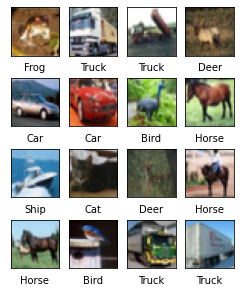

In [ ]:
plt.figure(figsize=(4, 5))

for i, image, label in zip(range(16), training_images, training_labels):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label[0]])

plt.show()

## Models

In [ ]:
# training_images = training_images[:20000]
# training_labels = training_labels[:20000]
# testing_images = testing_images[:4000]
# testing_labels = testing_labels[:4000]

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

Model compiling

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

Model Training

In [ ]:
history = model.fit(
    training_images, training_labels,
    epochs=50,
    validation_data=(testing_images, testing_labels)
)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4099 - accuracy: 0.8538 - val_loss: 1.0373 - val_accuracy: 0.7072
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4042 - accuracy: 0.8541 - val_loss: 1.0644 - val_accuracy: 0.7079
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3812 - accuracy: 0.8630 - val_loss: 1.1011 - val_accuracy: 0.6979
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3720 - accuracy: 0.8686 - val_loss: 1.1987 - val_accuracy: 0.6892
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3614 - accuracy: 0.8714 - val_loss: 1.1379 - val_accuracy: 0.6980
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3487 - accuracy: 0.8743 - val_loss: 1.2087 - val_accuracy: 0.6843
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3438 - accuracy: 0.8761 - val_loss: 1.2254 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
loss, accuracy*100

313/313 [==============================] - 1s 3ms/step - loss: 2.3639 - accuracy: 0.6725


(2.3638594150543213, 67.25000143051147)

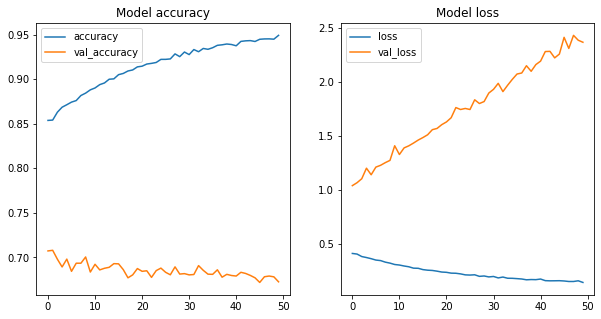

In [ ]:
history.history.keys()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Model accuracy")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Model loss")
plt.legend(loc="best")

In [ ]:
model.save(f"{SAVED_MODELS_PATH}{MODEL_VERSION}")

In [ ]:
model = models.load_model(SAVED_MODELS_PATH + MODEL_VERSION)

In [ ]:
from io import BytesIO

import numpy as np
from PIL import Image
import requests


def read_image_file_as_numpy(file_contents) -> np.ndarray:
    img = Image.open(BytesIO(file_contents))
    return np.expand_dims(np.array(img.resize((32, 32))), axis=0)/255


URL = "https://images.boats.com/resize/1/64/74/8296474_20220426085757685_1_LARGE.jpg?t=1650988682000"

img = read_image_file_as_numpy(requests.get(URL).content)
img.shape

(1, 32, 32, 3)

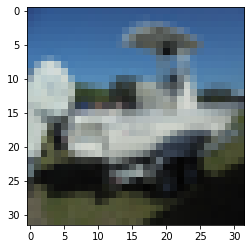

In [ ]:
plt.imshow(img[0])

In [ ]:
prediction = model.predict(img)

prediction, class_names[np.argmax(prediction)]

1/1 [==============================] - 0s 22ms/step


'Car'